In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [69]:
# set seed


#dataset
data = make_classification(n_features=10, n_informative=2, n_classes=2, random_state=42)
#to dataframe
df = pd.DataFrame(data[0])
df['y'] = data[1]

#X & y
X = data[0]
y = data[1]

In [72]:
# LinearSVC
C_values = [0.001, 0.01, 1, 10, 100]

for c in C_values:
  # Steps for pipeline
  steps = [
      ('scale', StandardScaler()),
      ('SVC', LinearSVC(C= c))
  ]

  # Pipeline
  clf = Pipeline(steps)
  #Fit
  clf.fit(X,y)

  # Predict
  preds = clf.predict(X)

  # Add to DF
  df['preds'+ str(c)] = preds

  print(f'Score at C={c}: {clf.score(X,y)}')
  print('- - -')

Score at C=0.001: 0.95
- - -
Score at C=0.01: 0.97
- - -
Score at C=1: 1.0
- - -
Score at C=10: 1.0
- - -
Score at C=100: 1.0
- - -


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


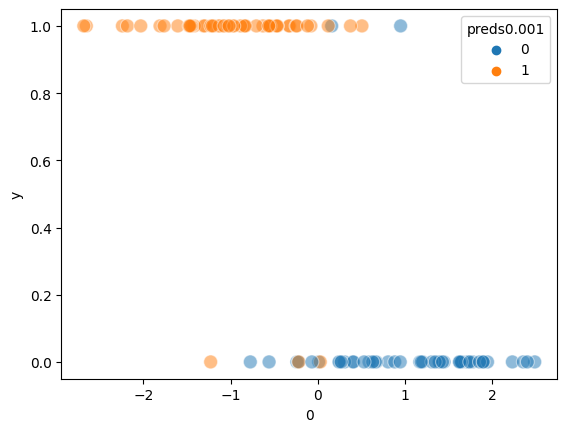

In [71]:
sns.scatterplot(data=df,
                x=df[0],
                y= 'y',
                hue= 'preds0.001',
                alpha=0.5,
                s=100);

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,y,preds0.001,preds0.01,preds1,preds10,preds100
0,-0.403708,-0.713525,0.788687,0.329442,1.843716,-1.193429,-0.314256,-1.193429,-0.635819,1.151991,1,1,1,1,1,1
1,-1.149884,1.569317,-1.334542,-0.536737,0.876755,0.556855,-0.249029,0.556855,1.246884,-0.331376,0,0,0,0,0,0
2,-0.903740,1.480528,-1.294589,-0.523061,-0.622237,0.709114,-0.151390,0.709114,1.189803,-0.508331,0,0,0,0,0,0
3,0.975961,-1.500776,1.300542,0.524697,-1.294942,-0.658066,0.181079,-0.658066,-1.201624,0.450590,1,1,1,1,1,1
4,2.237993,-0.136856,-0.303320,-0.150235,1.452550,2.120794,1.008018,2.120794,0.050219,-2.281386,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.408243,0.556003,-0.276325,-0.097912,-0.446774,-0.818366,-0.550000,-0.818366,0.367345,0.964233,1,1,1,1,1,1
96,2.729361,-1.533275,0.988605,0.376388,-1.270872,1.085591,0.984236,1.085591,-1.098836,-1.411759,0,0,0,0,0,0
97,-0.373484,1.187390,-1.107242,-0.451880,0.686849,0.925234,0.040677,0.925234,0.980351,-0.787365,0,0,0,0,0,0
98,0.880207,-0.375121,0.200153,0.072501,0.317767,0.481198,0.338821,0.481198,-0.253036,-0.575002,0,0,0,0,0,0
